interactive(children=(Dropdown(description='Field', options=('boop',), value='boop'), FloatSlider(value=1.0, d…

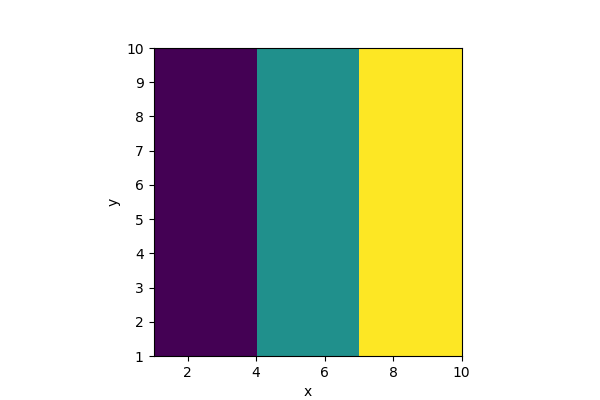

In [ ]:
import FD as FD

import importlib
importlib.reload(FD)
%matplotlib widget

import numpy as np

try:
    m = FD.Model(3)
except Exception as e:
    print(e)


In [20]:
import inspect

def main_func():
    # Code logic that may raise an error
    sdf
    raise ValueError(
        "Error message")

def tester():
    try:
        main_func()
    except Exception as e:
        frames = inspect.getinnerframes(e.__traceback__)
        print(frames)
        return frames

frames = tester()

[FrameInfo(frame=<frame at 0x0000017377DC8580, file 'C:\\Users\\Ephraim\\AppData\\Local\\Temp\\ipykernel_18812\\267845705.py', line 14, code tester>, filename='C:\\Users\\Ephraim\\AppData\\Local\\Temp\\ipykernel_18812\\267845705.py', lineno=11, function='tester', code_context=['        main_func()\n'], index=0, positions=Positions(lineno=11, end_lineno=11, col_offset=8, end_col_offset=19)), FrameInfo(frame=<frame at 0x0000017377F731A0, file 'C:\\Users\\Ephraim\\AppData\\Local\\Temp\\ipykernel_18812\\267845705.py', line 5, code main_func>, filename='C:\\Users\\Ephraim\\AppData\\Local\\Temp\\ipykernel_18812\\267845705.py', lineno=5, function='main_func', code_context=['    sdf\n'], index=0, positions=Positions(lineno=5, end_lineno=5, col_offset=4, end_col_offset=7))]


In [21]:
frame1 = frames[-1]
frame1.code_context

['    sdf\n']